## Set up and generate data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

plt.style.use('ggplot')
%matplotlib inline

In [2]:
X, label = make_moons(n_samples=200, noise=0.1, random_state=19)
print(X[:5,])

[[ 0.28171457  0.91044406]
 [ 0.8389241  -0.53005338]
 [ 0.40915474  0.80944352]
 [-0.98415213  0.13142155]
 [ 1.15919021  0.4910425 ]]


## Train the model

In [3]:
# model = DBSCAN?
model = DBSCAN(eps=0.25, min_samples=12, n_jobs=-1).fit(X)
print(model)

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=12, n_jobs=-1, p=None)


In [4]:
model.core_sample_indices_

array([  0,   1,   2,   7,   9,  10,  12,  13,  14,  18,  20,  21,  22,
        23,  24,  26,  28,  29,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  49,  50,  51,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,  88,  89,
        91,  92,  93,  94,  96,  98, 101, 102, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140,
       142, 143, 144, 145, 147, 148, 149, 150, 154, 155, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 170, 172, 173, 175, 177, 180, 182,
       183, 184, 187, 188, 189, 190, 191, 195, 197], dtype=int64)

## Access the cluster labels and core points

In [11]:
from collections import Counter
print(Counter(model.labels_))
print(model.labels_)

Counter({0: 100, 1: 99, -1: 1})
[ 0  1  0  0  0  0  1  0  1  1  0  0  0  1  0  1  0  1  1  1  1  0  0  1
  1  0  0  1  1  1  0  0  0  0  0  1  0  1  0  1  1  0  0  1  0  1  0  1
  0  1  1  1  1  1  1  1  1  1  0  0  1  1  0  1  0  0  0  0  0  0  1  0
  0  1 -1  1  0  1  1  1  0  1  0  0  1  1  0  0  1  0  0  0  0  0  0  1
  0  1  1  0  1  1  0  0  0  1  1  1  1  0  0  0  1  1  1  1  1  0  0  0
  1  0  1  1  1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  0  0  1
  1  0  0  1  1  0  0  1  1  1  1  1  1  0  1  1  1  0  0  0  1  0  1  1
  0  0  0  0  1  0  1  0  0  0  0  0  0  1  1  0  0  0  0  1  1  0  1  0
  1  0  0  0  1  0  1  0]


In [12]:
model.core_sample_indices_

array([  0,   1,   2,   7,   9,  10,  12,  13,  14,  18,  20,  21,  22,
        23,  24,  26,  28,  29,  31,  32,  33,  34,  35,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  49,  50,  51,  55,  56,  57,
        58,  59,  60,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,  88,  89,
        91,  92,  93,  94,  96,  98, 101, 102, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 117, 118, 119, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 134, 136, 137, 138, 139, 140,
       142, 143, 144, 145, 147, 148, 149, 150, 154, 155, 157, 158, 159,
       160, 162, 163, 164, 165, 166, 170, 172, 173, 175, 177, 180, 182,
       183, 184, 187, 188, 189, 190, 191, 195, 197], dtype=int64)

## Plot the clusters in feature space

C:\Users\Georf\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


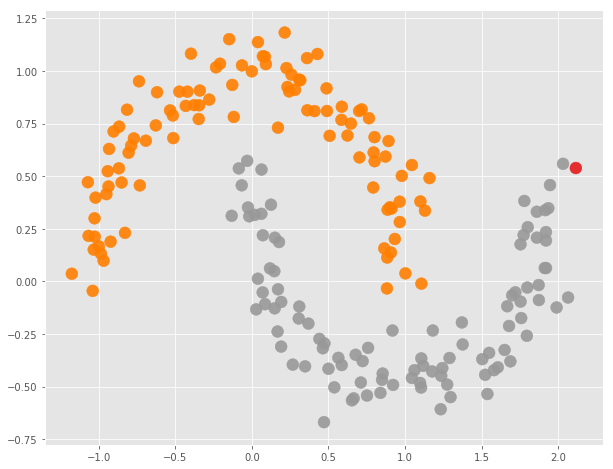

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sctr = ax.scatter(X[:, 0], X[:, 1], c=model.labels_, s=140, alpha=0.9, 
                  cmap=plt.cm.Set1)
fig.show()

## Level Set Tree with the two moons

### Customers data

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("Datasets/Wholesale customers data.csv", sep=',')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


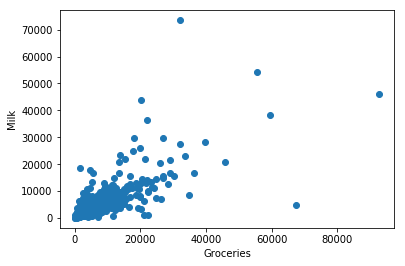

In [4]:
# Let's plot the data now
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [5]:
## Drop two first columns
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [6]:
data = df.as_matrix().astype("float32", copy = False)

C:\Users\Georf\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
data

array([[ 0.05293318,  0.52356774, -0.0411149 , -0.5893672 , -0.04356873,
        -0.06633907],
       [-0.39130196,  0.5444576 ,  0.17031835, -0.2701362 ,  0.08640684,
         0.08915104],
       [-0.44702926,  0.40853766, -0.02815711, -0.13753574,  0.13323164,
         2.2432926 ],
       ...,
       [ 0.20032552,  1.3146708 ,  2.3483863 , -0.5433798 ,  2.5112176 ,
         0.12145606],
       [-0.13538389, -0.51753575, -0.6025139 , -0.41944063, -0.5697703 ,
         0.21304613],
       [-0.72930694, -0.5559243 , -0.57322717, -0.6200942 , -0.5048875 ,
        -0.5228694 ]], dtype=float32)

In [8]:
## DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)

In [9]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
print(core_samples)

[False False False False False False False False False False False  True
 False False False  True False False False False False  True False False
 False False  True  True False False False  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False False False False  True False False False False  True False False
 False False False False False False  True  True  True False False  True
 False False False False False False  True False False False False False
 False  True  True False False False False False  True  True False False
 False False  True False False False  True  True  True False False  True
  True  True  True False False False False False False False False  True
  True  True  True  True False False False  True False False False False
 False False  True  True  True False  True  True  True False  True False
 False  True False False False False  True False Fa

In [10]:
from sklearn import metrics

In [11]:
## declare the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [17]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [12]:
## Computing the Silhouette Score
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labels))

Silhouette Coefficient: 0.123


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

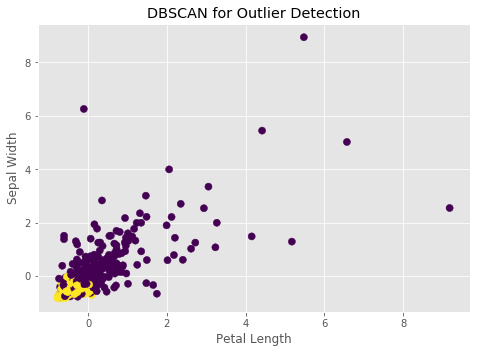

In [13]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_axes([.1,.1, 1,1])
colors = dbsc.labels_
ax.scatter(data[:,1], data[:,2], c=colors, s=50)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

0.3 epsilon value
Silhouette value : -0.13384391

0.4 epsilon value
Silhouette value : 0.026953774

0.5 epsilon value
Silhouette value : 0.123306066

1 epsilon value
Silhouette value : 0.53121394

2 epsilon value
Silhouette value : 0.7202357

3 epsilon value
Silhouette value : 0.75421613

4 epsilon value
Silhouette value : 0.7852087

5 epsilon value
Silhouette value : 0.8049528



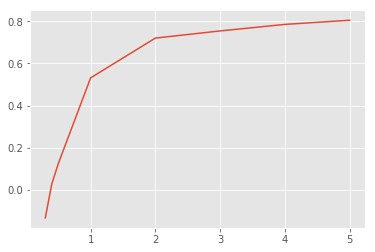

In [24]:
results = []
epsilon_options = [0.3, 0.4, 0.5, 1, 2, 3, 4, 5]

for epsilon in epsilon_options:
    model = DBSCAN(epsilon, min_samples = 15)
    model.fit(data)
    labels = model.labels_
    print(epsilon, "epsilon value")
    silhouette = metrics.silhouette_score(data, labels)
    print("Silhouette value :", silhouette)
    results.append(silhouette)
    print("")
    
pd.Series(results,epsilon_options).plot()

In [1]:
!pip install beautifulsoup4

mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
